In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import cufflinks as cf #very powerful and buetiful charts
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [162]:
file = ("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\hotel_bookings\\hotel_bookings.csv")

df = pd.read_csv(file)

In [163]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Lets start the data cleaning process 

In [165]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


For column 'adr' has very high max number which need to be remove

<AxesSubplot:>

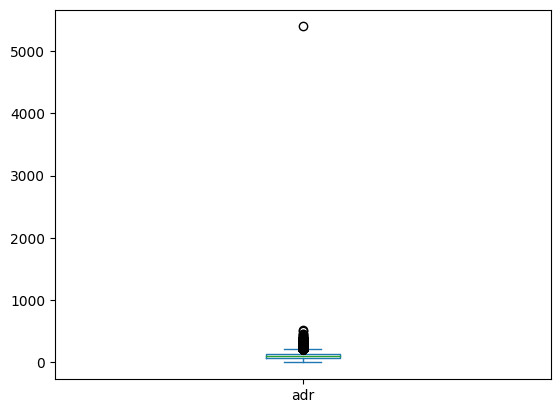

In [166]:
df.adr.plot(kind='box') #only one count of value which has > 5000

In [167]:
df[df['adr']>5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [168]:
df = df[df['adr']<5000 ]

Lets converts date in to proper format using pd.datetime

In [169]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

using map() function we replaced the value 0 and 1 by Not cancel and cancel

In [170]:
df.is_canceled  = df['is_canceled'].map({0:'Not_Cancel',1:'Cancel'})

In [171]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Not_Cancel,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Not_Cancel,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [172]:
df.describe(include='object')

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,119389,118901,119389,119389,119389,119389,119389,119389,119389
unique,2,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,Not_Cancel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,75166,13877,92309,48589,56477,97869,85993,74052,104641,89612,75166


In [173]:
df.meal.value_counts()

BB           92309
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

replaced Undefined = SC as mode value with help of replace function 

In [174]:
df.meal = df.meal.replace({'Undefined':'SC'})

In [175]:
df.drop('company',inplace=True,axis=1)
df.drop('arrival_date_week_number',inplace=True,axis=1)

we can fill children and agent missing values with median values

In [176]:
#lets define a function 
def impute_median(series):
    return series.fillna(series.median())

In [177]:
df.children = df['children'].transform(impute_median)
df.agent = df['agent'].transform(impute_median)


In [178]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [179]:
df.country.mode()

0    PRT
Name: country, dtype: object

In [180]:
df.country.isnull().sum()

488

In [181]:
df['country'].fillna(str(df['country'].mode().values[0]),inplace=True)

# done with missing value

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  object        
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_day_of_month       119389 non-null  int64         
 6   stays_in_weekend_nights         119389 non-null  int64         
 7   stays_in_week_nights            119389 non-null  int64         
 8   adults                          119389 non-null  int64         
 9   children                        119389 non-null  float64       
 10  babies                          119389 non-null  int64  

We can convert the arrival date year as string/categorical for future use

In [183]:
df['arrival_date_year'] = df['arrival_date_year'].apply(lambda x: str(x))

Now we can start the visualization part to give answers on client question

What type of hotel has more bookings?

Which are the most busy months?

Cancellation rates in the two types of hotels.

Types of visitors? (No. of adults, children, babies)

Repeated guests.

In [184]:
#What type of hotel has more bookings?
print('lets see the counts of hotel \n' , df.hotel.value_counts())

print('lets see the % of hotel \n' , df.hotel.value_counts(normalize=True)*100)


lets see the counts of hotel 
 City Hotel      79329
Resort Hotel    40060
Name: hotel, dtype: int64
lets see the % of hotel 
 City Hotel      66.44582
Resort Hotel    33.55418
Name: hotel, dtype: float64


Oh my god have you noticed the cancelation is almost half of the booking this might be a serius issue for business , lets descibe more which hotel has what % of cancellation 

In [185]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)*100

Not_Cancel    72.236645
Cancel        27.763355
Name: is_canceled, dtype: float64

In [186]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)*100

Not_Cancel    58.273771
Cancel        41.726229
Name: is_canceled, dtype: float64

In [187]:
print('for City Hotel','\n', df[df['hotel']=='City Hotel']['is_canceled'].value_counts())

print('for Resort Hotel',' \n ', df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts())

for City Hotel 
 Not_Cancel    46228
Cancel        33101
Name: is_canceled, dtype: int64
for Resort Hotel  
  Not_Cancel    28938
Cancel        11122
Name: is_canceled, dtype: int64


The "Resort Hotel " has the more cancellation i.e almost > of its booking it may be due to the Price, accessability 

Where on opposite side citu hotel has lesser cancellation because city hotels are accessable easily and may be this is cheaper than resort hotels

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Booking & Cancellation w.r. to Hotel')

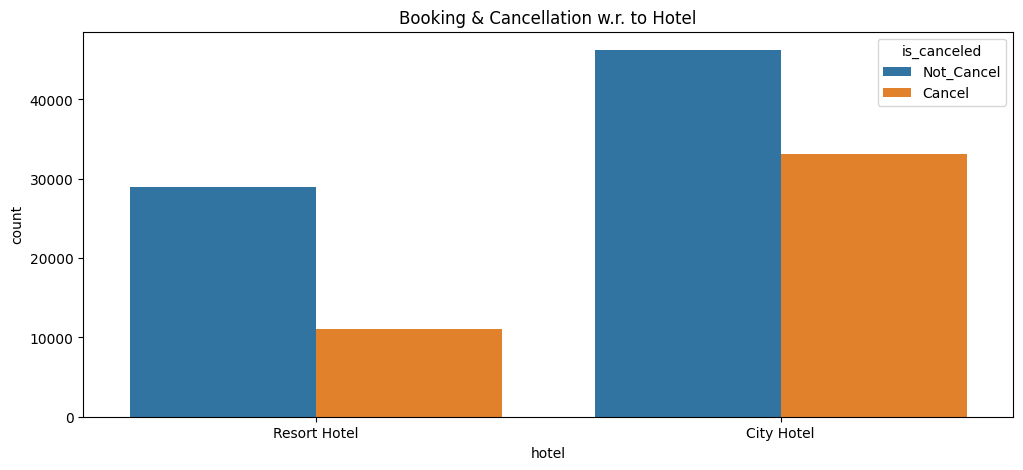

In [188]:
#lets plot charts it will explain more than numbers
plt.figure(figsize=(12,5))
sns.countplot(df.hotel,hue=df.is_canceled,data=df,)
plt.title('Booking & Cancellation w.r. to Hotel')

In [189]:
# plt.figure(figsize=(16,7))

# sns.lineplot(x=df['reservation_status_date'],y=df.adr,data=df)
# sns.lineplot(x=df['reservation_status_date'],y=df.adr,data=df)

resort_hotel_avg =resort_hotel.groupby('reservation_status_date')[['adr']].mean()

city_hotel_avg =city_hotel.groupby('reservation_status_date')[['adr']].mean()

We can see the below line plot is explining that the resort hotel has the higher price and large spikes compare to the city hotel This is may be on weekend

On other side the city hotel price trend is constant more a less.

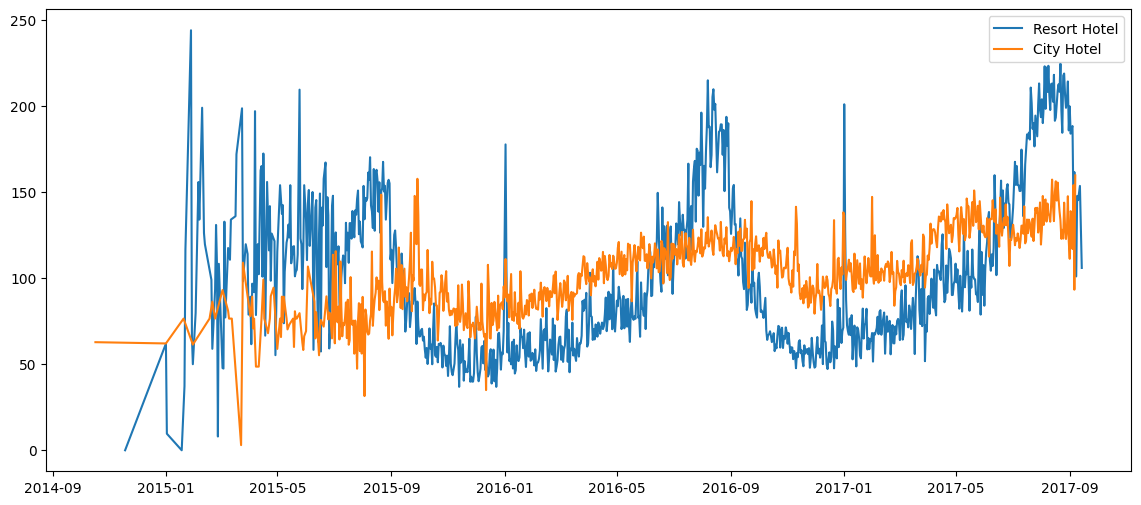

In [190]:
#lets prepare the line plot
plt.figure(figsize=(14,6))
plt.plot(resort_hotel_avg.index,resort_hotel_avg['adr'],label='Resort Hotel')
plt.plot(city_hotel_avg.index,city_hotel_avg['adr'],label='City Hotel')
plt.legend()

# Which are the most busy months for booking ?

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

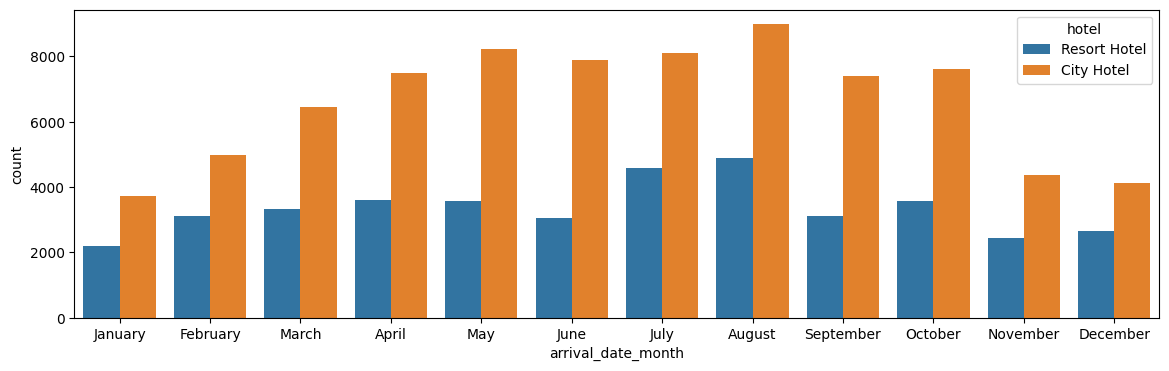

In [191]:

plt.figure(figsize=(14,4))
sns.countplot(x=df.arrival_date_month,data=df,hue='hotel',order=["January","February","March","April","May",
                                                                 "June","July","August","September","October",
                                                                 "November","December"])


Based on above charts we can gutfully say that the most busy months are April to October for City hotel where as the most busy months are July and August for Resort hotel. May be people are love to summer vecation etc.

Where on the other hand the bookings are low during Dec and Jan it may due to the weither conditions rainy or hot season etc

There may be a price factor also affect like in Dec we have a Cristmus and in Jan we have a new year celebration so during that time the prices are very high



# 3 Cancellation rates in the two types of hotels?

([<matplotlib.patches.Wedge at 0x1ade7dfcc10>,
 [Text(-0.4355586942656605, 1.010093373827189, 'Not_Cancel'),
  Text(0.4355585996938914, -1.0100934146071325, 'Cancel')],
 [Text(-0.23757746959945117, 0.5509600220875575, '62.96'),
  Text(0.23757741801484983, -0.5509600443311632, '37.04')])

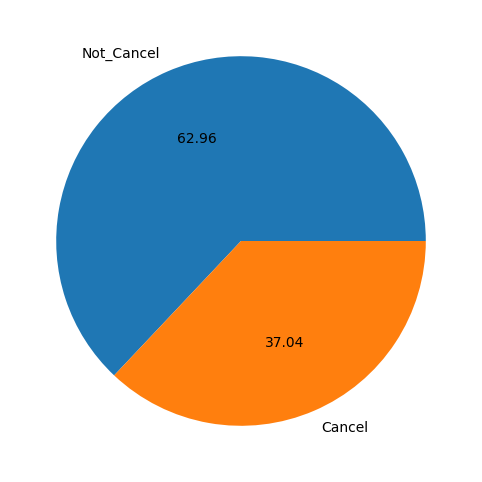

In [192]:
plt.figure(figsize=(10,6))
name = df['is_canceled'].value_counts().index
numbers = df['is_canceled'].value_counts()

plt.pie(x=numbers,labels=name,autopct='%2.2f')

<AxesSubplot:xlabel='months', ylabel='count'>

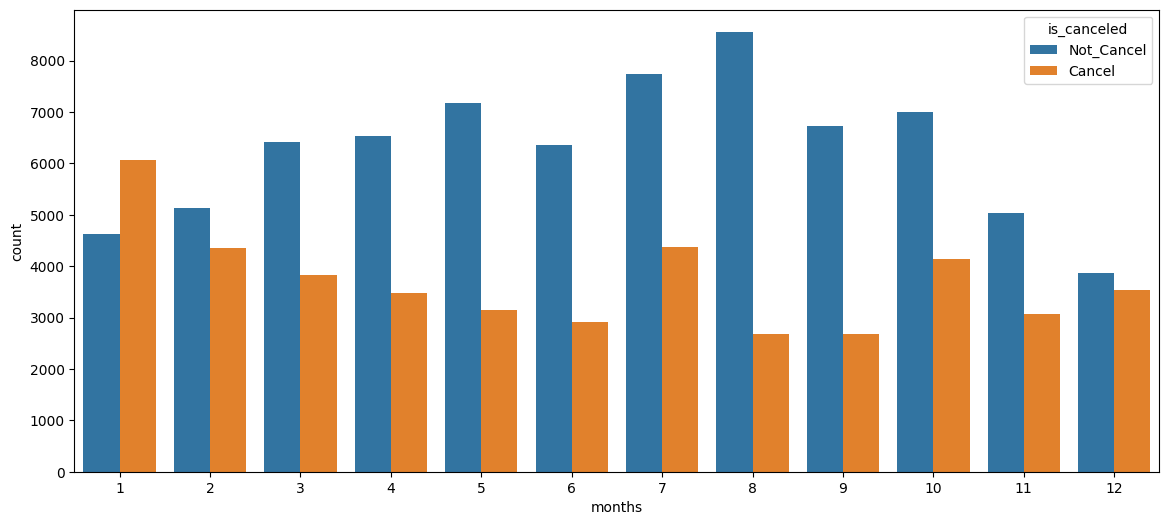

In [195]:
df['months'] = df.reservation_status_date.dt.month

plt.figure(figsize=(14,6))
sns.countplot(x=df.months,data=df,hue='is_canceled')

if see the Pie chart we can see the cancellation are almost half of the booking so we this is a major concern in the view of business 

The positive thing is more than 60% people are not canceled there booking

The lower cancelation are mostly happened on Aug and Sep month where booking was also very high numbers 

On other hand Jan month has highest booking cancelation and then July month has higher cancelation rate

If we saw the Hotel wise same trend we saw the most booking ware done on August month and most cancelation doen on Jan and December 

Text(0.5, 1.0, 'City Hotel cancelation Trend')

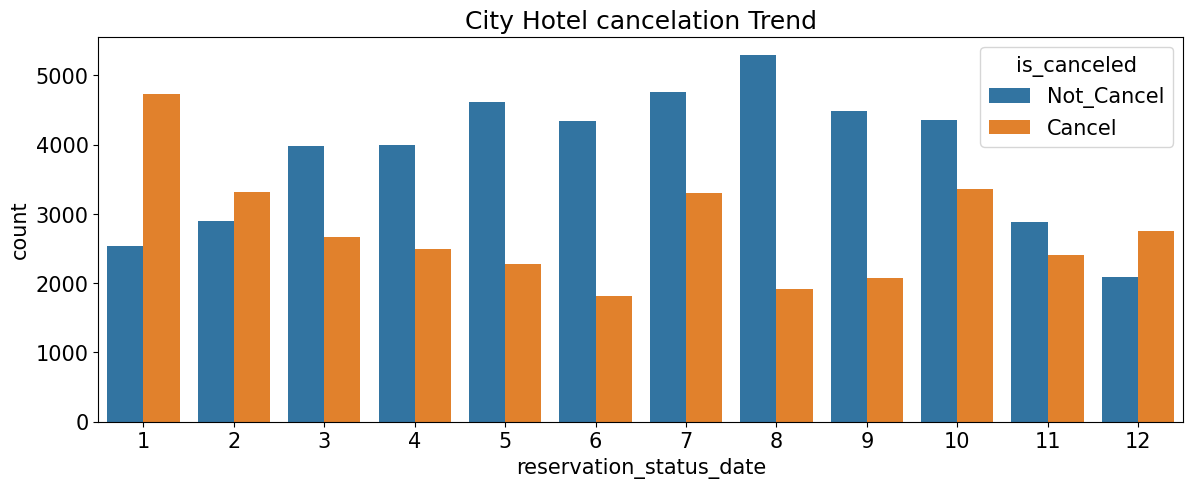

In [391]:
city_hotel_month = city_hotel.reservation_status_date.dt.month
plt.figure(figsize=(14,5))
sns.countplot(x=city_hotel_month,data=city_hotel,hue='is_canceled')
plt.title('City Hotel cancelation Trend')

Text(0.5, 1.0, 'Resort Hotel cancelation Trend')

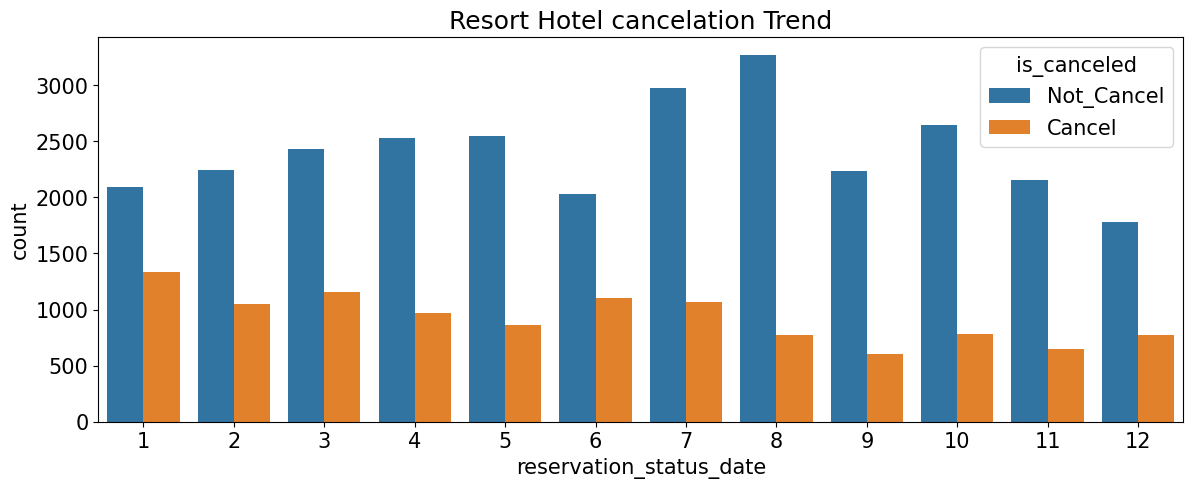

In [390]:
resort_hotel_month = resort_hotel.reservation_status_date.dt.month
plt.figure(figsize=(14,5))
sns.countplot(x=resort_hotel_month,data=resort_hotel,hue='is_canceled')
plt.title('Resort Hotel cancelation Trend')

# 4 Types of visitors? (No. of adults, children, babies)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='babies', ylabel='count'>

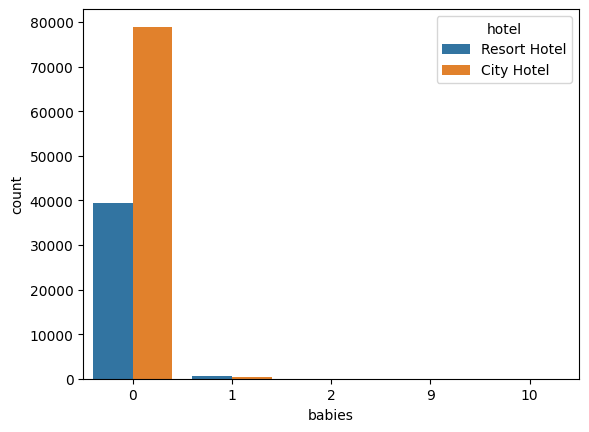

In [ ]:
sns.countplot(df['babies'],hue=df.hotel)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='children', ylabel='count'>

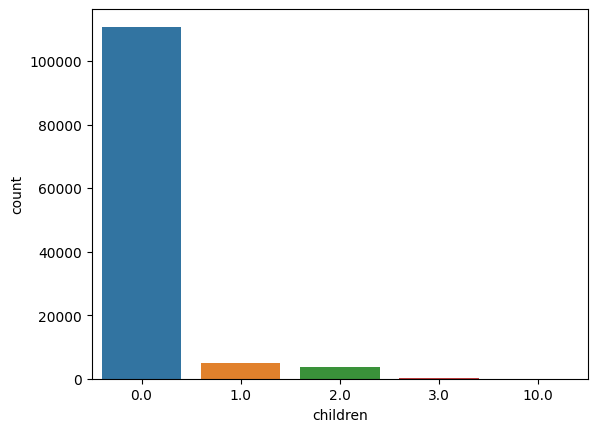

In [ ]:
sns.countplot(df['children'],hue=df.hotel)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='adults', ylabel='count'>

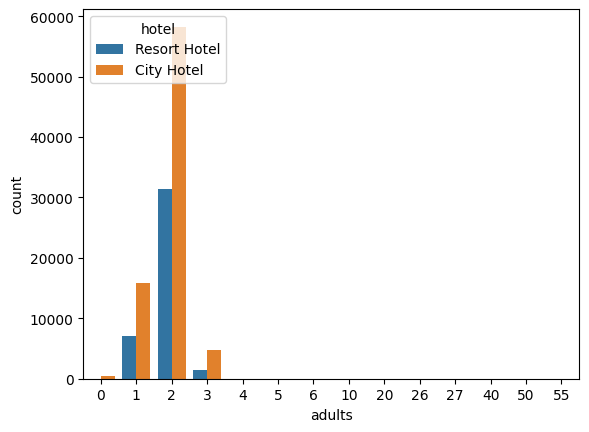

In [ ]:
sns.countplot(df['adults'],hue=df.hotel)

So Adult are the most visitor for both the hotel, we also analysed that the people are less often carry there childs either 1 or 2 . same observation on baby's as few people are carying 1 baby during their visit to the hotels 

# 5. Repeated guests are there ?

In [ ]:
df.is_repeated_guest.value_counts()

0    115579
1      3810
Name: is_repeated_guest, dtype: int64

<AxesSubplot:>

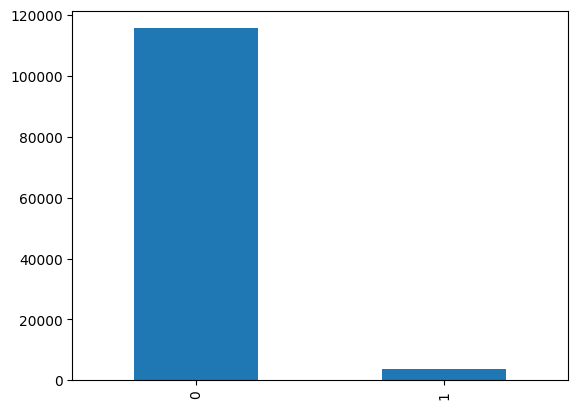

In [ ]:
df.is_repeated_guest.value_counts().plot(kind='bar')

There are only around 3% of perople are revisiting the hotels

#so hotel management need to be give a promotional offers to revisitors so they can prefer the same hotel

# Advance EDA and OOPs

In [ ]:
df.describe(include='object')

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,2,3,12,4,177,8,5,10,12,3,4,3
top,City Hotel,Not_Cancel,2016,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79329,75166,56706,13877,92309,49077,56477,97869,85993,74052,104641,89612,75166


Lets check what are the unique values are in all columns

In [199]:
# Lets start and see the object column which has the unique data

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*35)

# we u





hotel
['Resort Hotel' 'City Hotel']
-----------------------------------
is_canceled
['Not_Cancel' 'Cancel']
-----------------------------------
arrival_date_year
['2015' '2016' '2017']
-----------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-----------------------------------
meal
['BB' 'FB' 'HB' 'SC']
-----------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM'

In [202]:
df['market_segment'] = df.market_segment.replace({'Undefined':'Online TA'}) # replace with mode value

In [204]:
df['distribution_channel'] = df['distribution_channel'].replace({'Undefined':'TA/TO'}) # replace with mode value

Now our data is fully ready for futher analysis

# Where do the guests come from ?

In [212]:
df['country'].value_counts()[:5] #Top 5 country

PRT    49077
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

([<matplotlib.patches.Wedge at 0x1adf53bf820>,
 [Text(-1.1289244509296923, -0.21915652874850153, 'PRT'),
  Text(0.8400997978272062, -0.7853230734485569, 'GBR'),
  Text(1.1480709704741863, 0.06658112911674013, 'FRA'),
  Text(0.8494868769470453, 0.7751593680623073, 'ESP'),
  Text(0.2975353591392949, 1.1108432427943429, 'DEU')],
 [Text(-0.6380877331341739, -0.12387108146654432, '56.10%'),
  Text(0.47483901616320345, -0.44387825890570604, '13.87%'),
  Text(0.6489096789636706, 0.03763281210946181, '11.91%'),
  Text(0.4801447565352864, 0.43813355586130415, '9.79%'),
  Text(0.1681721595135145, 0.6278679198402807, '8.33%')])

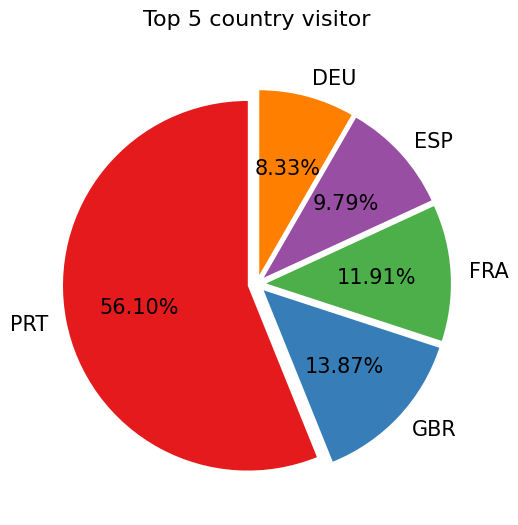

In [238]:
name = df['country'].value_counts()[:5].index
number = df['country'].value_counts()[:5]
#colors=['blue','red','black','orenge','white']

plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 15.0
plt.title('Top 5 country visitor',fontdict={"fontsize":16},pad=20)
plt.pie(labels=name,x=number, data=df,autopct='%1.2f%%',startangle=90,colors=sns.color_palette('Set1'),
        explode=[0.05, 0.05, 0.05, 0.05, 0.05])

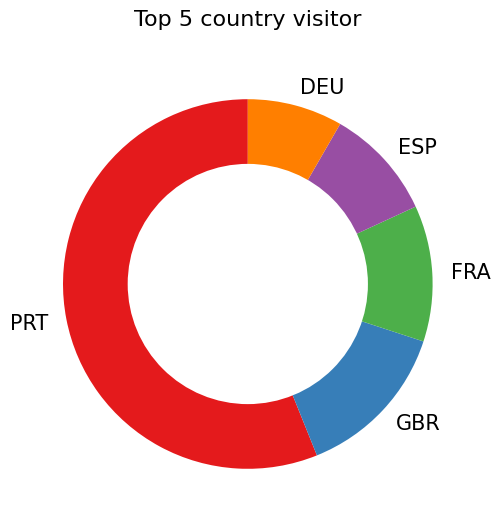

In [240]:
plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 15.0
plt.title('Top 5 country visitor',fontdict={"fontsize":16},pad=20)
plt.pie(labels=name,x=number, data=df,startangle=90,colors=sns.color_palette('Set1'))
hole = plt.Circle((0, 0), 0.65, facecolor='white')
# autopct='%1.2f%%'
# Current Figure ( plt.gcf() ) 
# --> Current Axis ( gca() ) 
# --> add the hole 
plt.gcf().gca().add_artist(hole)

# Portugal 
Most of the visitors are coming from Portugal Country

# How much do guests pay for a room per night?

In [244]:
# Lets prepare to srt out the data where not canceled ( resort_hotel_nc - for n=Not c= cancel)

# resort_hotel_nc = resort_hotel[resort_hotel['is_canceled'] =='Not_Cancel']
# city_hotel_nc = city_hotel[city_hotel['is_canceled']=='Not_Cancel']

In [245]:
# resort_hotel_nc['price_per_day'] = resort_hotel_nc['adr'] / (resort_hotel_nc["adults"] + resort_hotel_nc["children"])
# city_hotel_nc['price_per_day'] = city_hotel_nc['adr'] / (city_hotel_nc["adults"] + city_hotel["children"])

In [248]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,months
0,Resort Hotel,Not_Cancel,342,2015,July,1,0,0,2,0.0,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,Not_Cancel,737,2015,July,1,0,0,2,0.0,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7


In [249]:
df_nc = df[df['is_canceled']=='Not_Cancel']

df_nc['price'] = df_nc['adr'] / (df_nc['adults'] +df_nc['children'] ).mean()

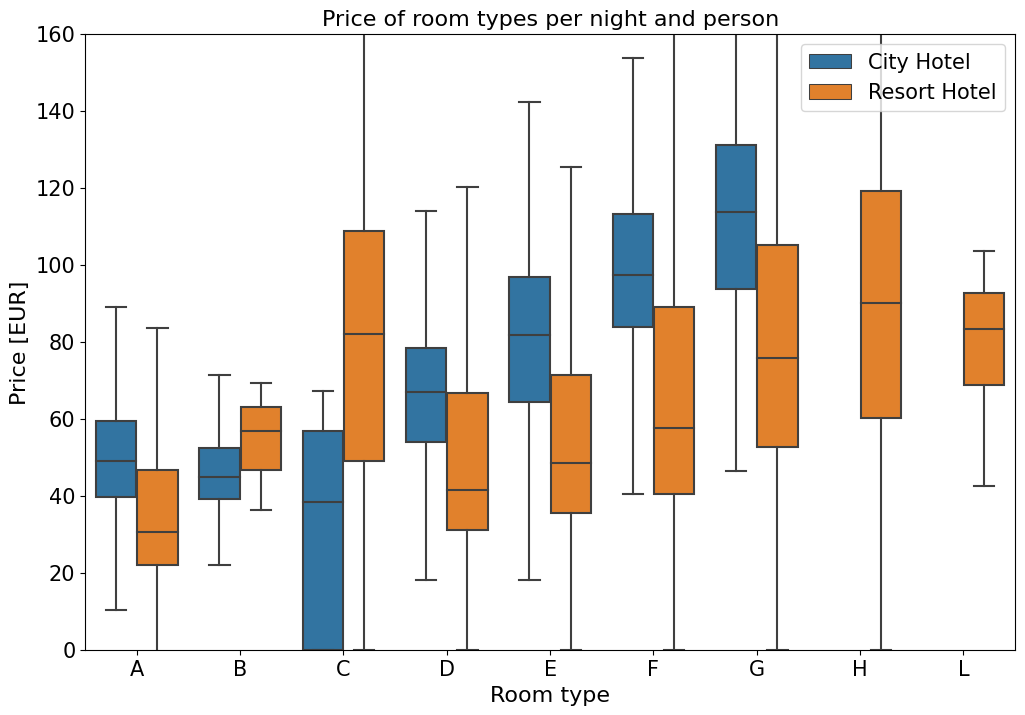

In [261]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_nc["reserved_room_type"],
            y=df_nc['price'],
            hue=df_nc["hotel"],
            data=df_nc, 
            hue_order=["City Hotel", "Resort Hotel"],fliersize=0,
            order=['A', 'B', 'C','D', 'E', 'F', 'G', 'H', 'L'])
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

based on above box plot chart it is clear that the price per night is varying according to its room type.

The Portugal is in Urope so may be we can use the EUR currency for 

Also due to the data anonymization rooms with the same type letter may not necessarily be the same across hotels.

# How does the price per night vary over the year?

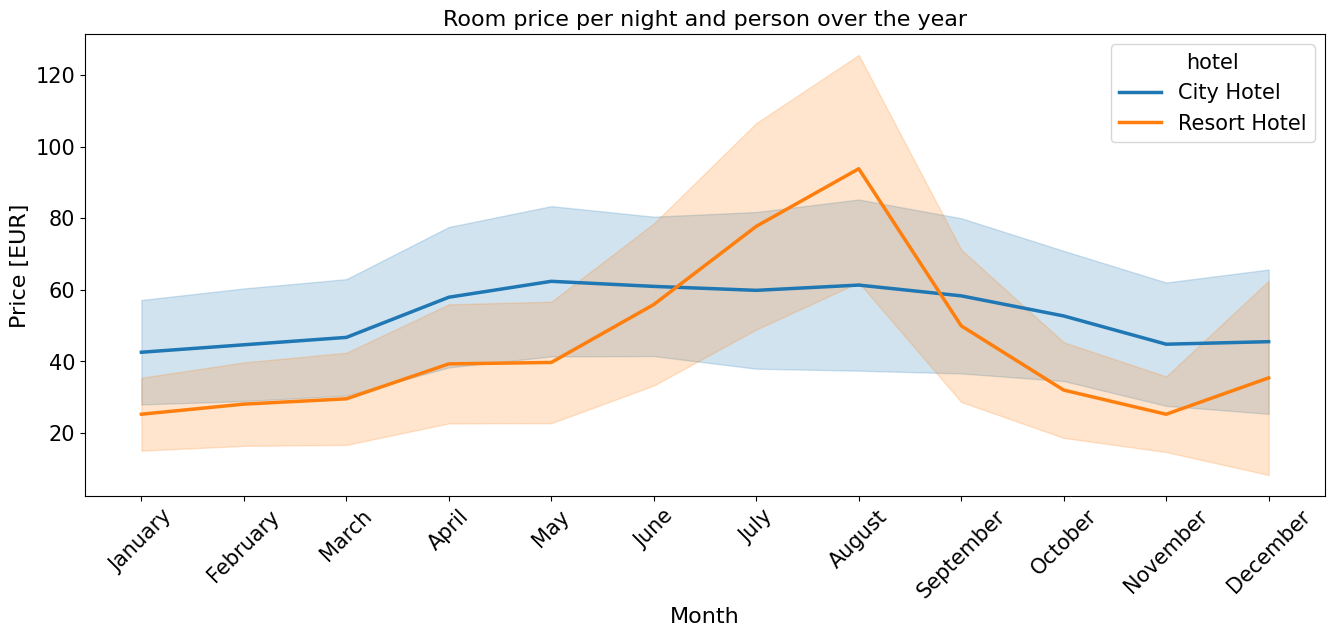

In [274]:
# grab data:

df['price'] = df_nc['adr'] / (df_nc['adults'] +df_nc['children'] ).mean()

room_prices_mothly = df[["hotel", "arrival_date_month", "price"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(16, 6))
sns.lineplot(x = "arrival_date_month", y="price", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()


So it is clear that the resort hotels price are more very and city hotel some what constant 

Resort hotel prices are high during summer months it may be due to the summer vecation 

# How long do people stay at the hotels?

In [367]:
name =df.total_nights.value_counts().index
            
number =df.total_nights.value_counts()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


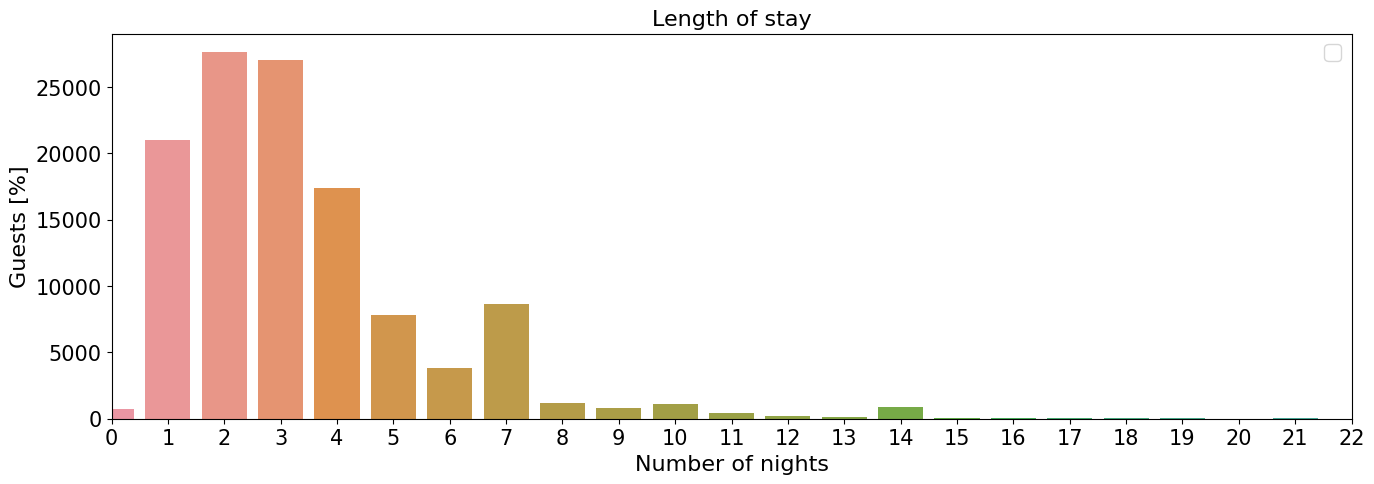

In [370]:
#show figure:
plt.figure(figsize=(16, 5))
sns.barplot(x=name,y=number)
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

it is clear that the people are mostly stay 1-4 nights mostly in few cases their are few people are stayed 7 days mostly

# Bookings by market segment ?

In [377]:
segments=df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

Online segment has the max numbers of booking and it is a fact that now a days their is a large amount of review and searches are going on internet, so it expected behaviour 

# Which month have the highest number of cancelations?

<AxesSubplot:xlabel='months', ylabel='count'>

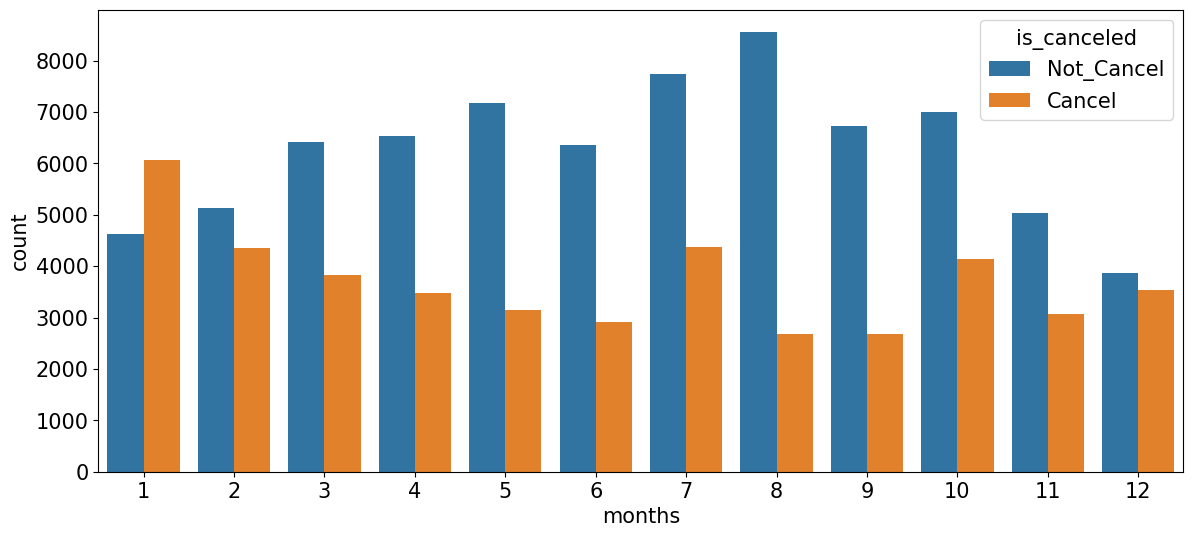

In [386]:
#df['months'] = df.reservation_status_date.dt.month

plt.figure(figsize=(14,6))
sns.countplot(x=df.months,data=df,hue='is_canceled')

The city_hotel cancelation trend is very high compare to the Resort Hotel as shown below

City hotel cancekation is 41% where on resort hotel cancelation is 27%

Not_Cancel    58.273771
Cancel        41.726229
Name: is_canceled, dtype: float64


Text(0.5, 1.0, 'City Hotel cancelation Trend')

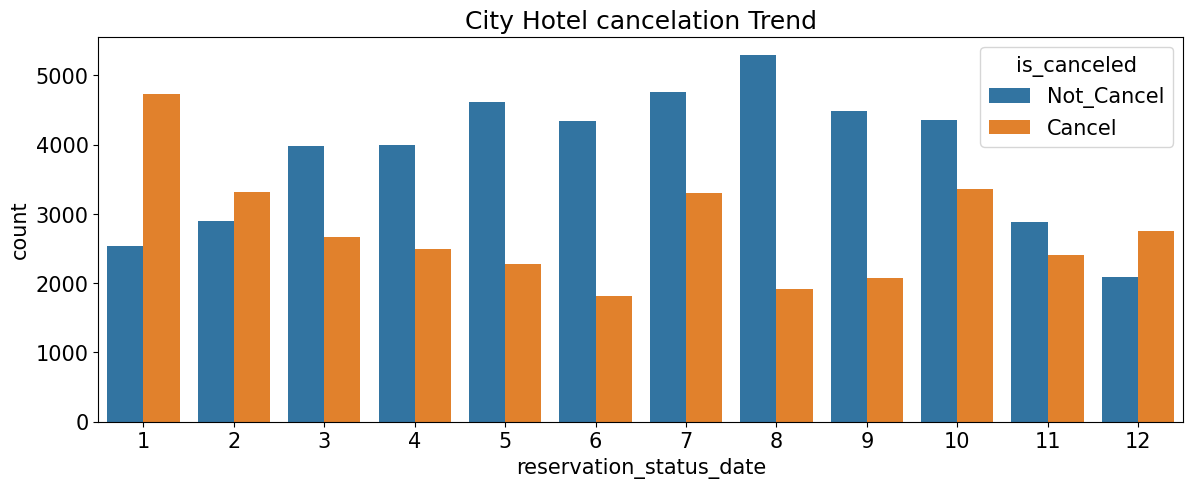

In [394]:
city_hotel_month = city_hotel.reservation_status_date.dt.month
print(city_hotel.is_canceled.value_counts(normalize=True)*100)
plt.figure(figsize=(14,5))
sns.countplot(x=city_hotel_month,data=city_hotel,hue='is_canceled')
plt.title('City Hotel cancelation Trend')

Not_Cancel    72.236645
Cancel        27.763355
Name: is_canceled, dtype: float64


Text(0.5, 1.0, 'City Hotel cancelation Trend')

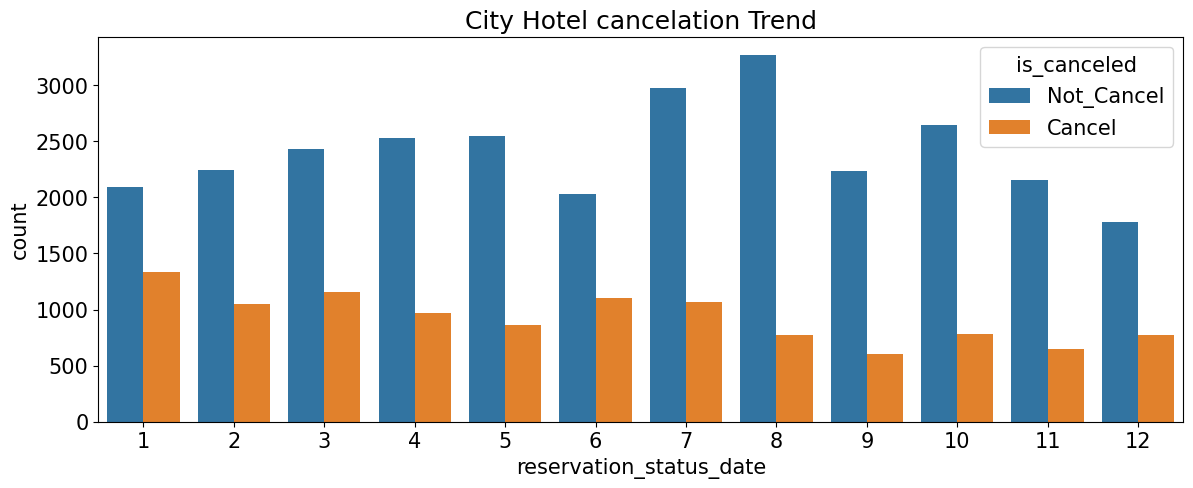

In [395]:
resort_hotel_month = resort_hotel.reservation_status_date.dt.month
print(resort_hotel.is_canceled.value_counts(normalize=True)*100)
plt.figure(figsize=(14,5))
sns.countplot(x=resort_hotel_month,data=resort_hotel,hue='is_canceled')
plt.title('City Hotel cancelation Trend')

# Predict cancelations

lets import some model

In [406]:
! pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [408]:
! pip install eli5

     -------------------------------------- 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
  Running setup.py install for eli5: started
  Running setup.py install for eli5: finished with status 'done'


  DEPRECATION: eli5 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [409]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5 # Feature importance evaluation

In [401]:
cancel_corr = df.corr()

In [404]:
df.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
Cancel       Canceled              43016
             No-Show                1207
Not_Cancel   Check-Out             75166
Name: reservation_status, dtype: int64

In [411]:
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [415]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]
               #("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}")

DT_model cross validation accuarcy score: 0.821 +/- 0.0003 (std) min: 0.8208, max: 0.8215
RF_model cross validation accuarcy score: 0.8646 +/- 0.001 (std) min: 0.8629, max: 0.8655
LR_model cross validation accuarcy score: 0.7952 +/- 0.0006 (std) min: 0.7945, max: 0.7962


The RandomForst model performs best.
I also did some hyperparameter optimization, but the accuracy increase is minimal

In [416]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8671 +/- 0.0016 (std) min: 0.8652, max: 0.8695


# 3. Evaluate Feature importance

In [417]:
# fit model(pipeline) so values can be accessed:
model_pipe.fit(X,y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first: 
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head(10)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,feature,weight,std
0,lead_time,0.155094,0.017870
1,deposit_type_Non Refund,0.142507,0.099036
2,adr,0.103092,0.003387
3,arrival_date_day_of_month,0.078891,0.002303
4,deposit_type_No Deposit,0.062702,0.094625
5,total_of_special_requests,0.052833,0.011780
6,agent,0.048556,0.012340
7,stays_in_week_nights,0.043496,0.002409
8,previous_cancellations,0.041300,0.014804
9,market_segment_Online TA,0.031057,0.012477


Looking at the three most important features:

lead_time

deposit_type

adr


In [449]:
# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

In [444]:
lead_cancel_data_10

,count,unique,top,freq
lead_time,,,,
0,6345,2,Not_Cancel,5915
1,3460,2,Not_Cancel,3139
2,2069,2,Not_Cancel,1856
3,1816,2,Not_Cancel,1634
4,1715,2,Not_Cancel,1539
...,...,...,...,...
608,17,1,Cancel,17
615,17,1,Cancel,17
622,17,1,Cancel,17


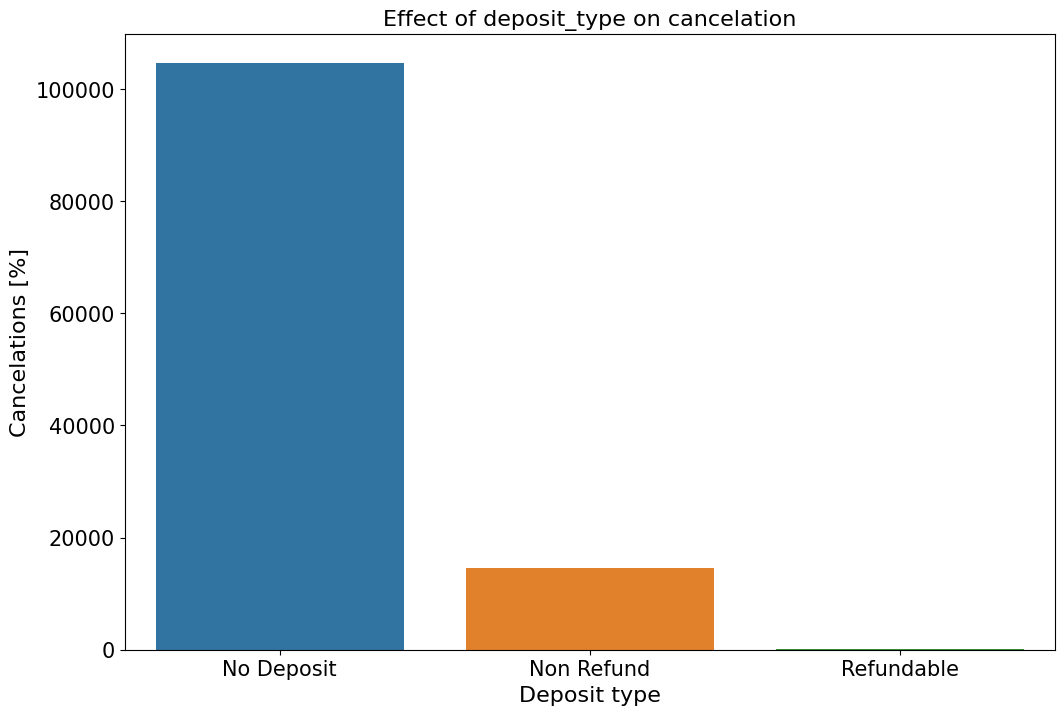

In [437]:
# group data for deposit_type:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data['count'])
plt.title("Effect of deposit_type on cancelation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [433]:
deposit_cancel_data

,count,unique,top,freq
deposit_type,,,,
No Deposit,104641,2,Not_Cancel,74947
Non Refund,14586,2,Cancel,14493
Refundable,162,2,Not_Cancel,126


In [439]:
# feat importance of original model:
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.155094,0.017870
1,deposit_type_Non Refund,0.142507,0.099036
2,adr,0.103092,0.003387
3,arrival_date_day_of_month,0.078891,0.002303
4,deposit_type_No Deposit,0.062702,0.094625
5,total_of_special_requests,0.052833,0.011780
6,agent,0.048556,0.012340
7,stays_in_week_nights,0.043496,0.002409
8,previous_cancellations,0.041300,0.014804
9,market_segment_Online TA,0.031057,0.012477


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  object        
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  object        
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_day_of_month       119389 non-null  int64         
 6   stays_in_weekend_nights         119389 non-null  int64         
 7   stays_in_week_nights            119389 non-null  int64         
 8   adults                          119389 non-null  int64         
 9   children                        119389 non-null  float64       
 10  babies                          119389 non-null  int64  